## Finite elements method (general)
The implementation of the finite elements method is not as easy as it may appear, thus we start with a brief inte introduction on what we are going to do.

Given a bilinear form $a: V\times V \to \mathbb{R}$ and a function $f \in V^*$, we want to find $u \in V$ such that


$$ a(u,v) = \langle f,v \rangle$$

In the prototypical case we have studied we have 


$$V:= H'_0(\Omega)\, , \qquad a(u,v) := \int_{\Omega} dx \, \nabla u \cdot \nabla v \, ,\qquad
\langle f, v \rangle := \int_{\Omega} dx \, v \, f $$

To do this, we first discretize the space and obtain $V_h \subset V$, then we find $u_h \in V_h$ such that 

$$ a(u_h, v_h) = \langle f, v_h \rangle \quad \forall v_h \in V_h \subset V$$

What we are going to be constructing numerically is $V_h = span\{ v_i \}_{i=0}^{N-1}$, then we can find the vector $u_h$ using

$$ A_{ij} u^j = f_i $$

(or its inverse to be precise). Here $A_{ij}$ is the matrix constructed as follows 

$$A_{ij} := a(v_i, v_j) := \int_{\Omega} dx \, \nabla v_i \cdot \nabla v_j $$

As we can see, the two main steps to follow if we wish to implement the finite elements method are the following:
- Construction of $V_h$.
- Computation of $A_{ij}$ and $f_i$.

The first step in this direction is to split $\Omega$ into "simple" subdomains as follows

$$ \Omega = \mathring{\overline{\bigcup_{k=0}^{M-1} \overline{T}_k }} \qquad \mathcal{T}_h = \{ T_k\}_{k=0}^{M-1} $$


In 1D these would be line intervals such as $T_k = (q_k , q_{k+1})$. In two dimensions one usually chooses something which is easy to contruct from the computational point of view like, e.g., triangular subdomains.
<div>
    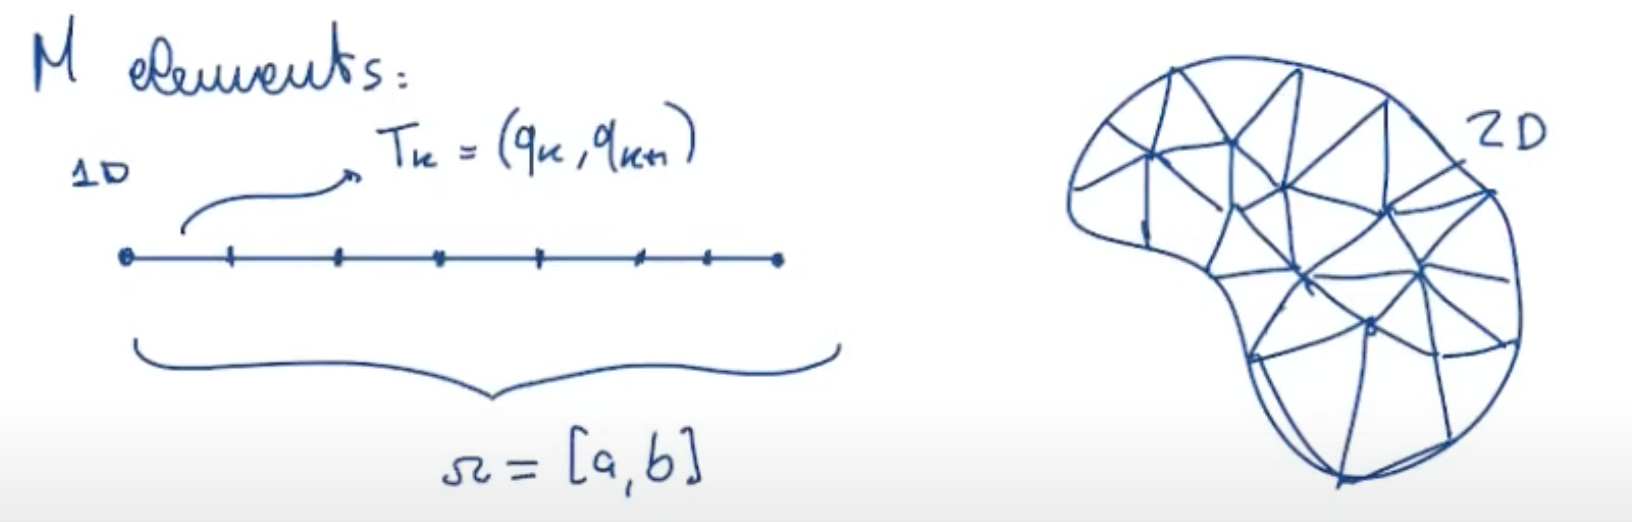
</div>

Now, whatever the dimension we are workingin, we can always write our subdomain as

$$ T_k = F_k (\hat{T}) $$


where $\hat{T}$ is a reference domain and $F_k: \hat{T} \to T_k $ is an appropriate function.

<div>
    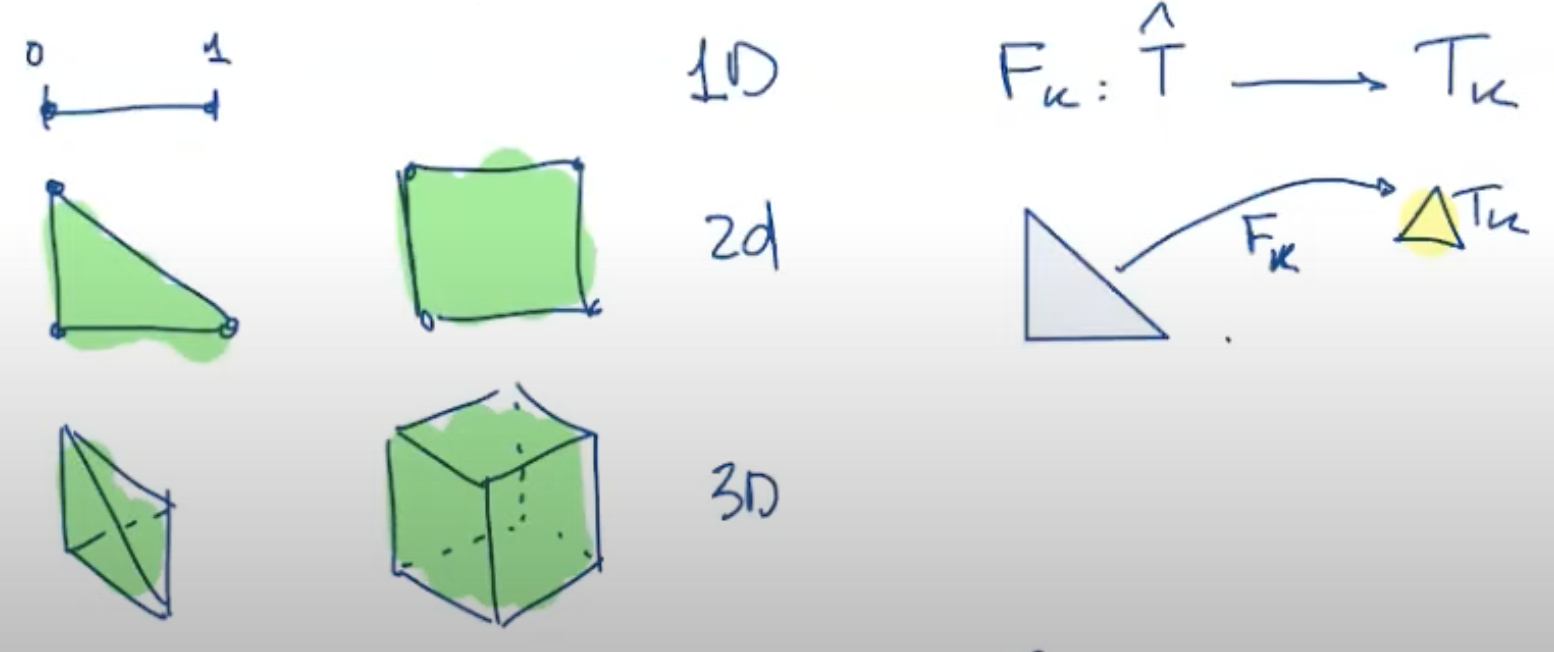
</div>

Thus, once we define a good approximation space for the reference element, we also obtain a good approximation space for our domains

$$ \left. V_h \right|_{T_k} = span\{ \hat{v}_\alpha \circ F_k^{-1} \}_{\alpha = 0}^{ N_{\text{loc}} -1} $$


We are assuming that $ V_h \subset V \; \longrightarrow \; V_h \subset C^0{\large(}\,\overline{\Omega}\,{\large)} $

With this type of construction we can always write 


$$ P_{k i \alpha} = \left\{\begin{array}{cl}
1 &&  \text{if} \; \;v_i(F_k(\hat{x})) = \hat{v}_\alpha (\hat{x}) \;\; \forall \hat{x} \in \hat{T}\\
0 && \text{otherwise}
\end{array} \right. $$


This is a $(M,N,N_{\text{loc}})$ matrix. $N_{\text{loc}}$ is actually depending on the number of local basis functions we are using in our approximation, and typically is small ($\approx d+1$). $N$ is the number of global basis functions we are using.


$ M$ is PORCO DIO.

In the end we arrive at the following formula:


$$ \int_{\Omega} dx \, g(x)  \sum_{k=0}^{M-1} \int_{T_k} dx \, g(x) = \sum_{k=0}^{M-1} \int_{\hat{T}} d\hat{x} \, J\, (g \circ F_k^{-1}) $$


where $J = \det(\partial F_k / \partial \hat{x} )$ is the jacobian for the transformation.
In practice this allows to pull back all the integrals on the subdomains to integrals on the reference domain $\hat{T}$. We can approximate the latter computation as follows:

$$ \int_{\hat{T}} d \hat{x} \, J \, (g \circ F_k) = \sum_{q = 0}^{N_q -1} (g \circ F_k)(\hat{x}_q) \, J_q  \hat{w}_q $$


where $\hat{x}_q, \hat{w}_q$ is a quadrature rule on $\hat{T}$

Applying to our case we have

$$f_i = \int_{\Omega} dx \, f v_i = \sum_k \int_{T_k} dx \, f v_i = \sum_k \int_{\hat{T}} d\hat{x} \, J \,(f\circ T_k ) \hat{v}_{\alpha} P_{ki\alpha}$$

and using quadrature rule on the reference domain $\hat{T}$ we finally get

$$ = \sum_k \sum_q (f\circ F_k)(\hat{x}_q) \, \hat{v}_{\alpha}(\hat{x}_q)\, J_q\,  w_q \, 
P_{ki\alpha}$$

The only remaining problem is how to compute the matrix element $A_{ij}$. To do this we first notice that


$$ \frac{\partial}{\partial \hat{x}} (\underbrace{v_i \circ F_k }_{= \hat{v}_\alpha}) = \left[ \left( \frac{\partial}{\partial x} v_i \right) \circ F_k \right] \underbrace{\left(\frac{\partial}{\partial \hat{x}} F_k \right)^T}_{=\mathbb{F}^T}$$


$$ \Rightarrow \qquad (\nabla v_i) \circ F_k = (\hat{\nabla} \hat{v}_\alpha ) \, \mathbb{F}^{-T} $$

Using this result (plus some algebra) we can write

$$ A_{ij} := \sum_k \sum_q [\underbrace{(\hat{\nabla} \hat{v}_{\alpha}) (\hat{x}_q) \, \mathbb{F}^{-T}(\hat{x}_q)\, P_{ki\alpha}}_{\nabla v_i}] \, [\underbrace{(\hat{\nabla} \hat{v}_{\beta}) (\hat{x}_q) \, \mathbb{F}^{-T}(\hat{x}_q)\, P_{kj\beta}}_{\nabla v_j}]\, J_q \, w_q = \sum_k P_{ki\alpha} \, a_{\alpha \beta} \, P_{kj\beta} $$

where the local contribution $a_{\alpha \beta}$ is given by

$$ a_{\alpha \beta} = \sum_q [(\hat{\nabla} \hat{v}_{\alpha}) (\hat{x}_q) \, \mathbb{F}^{-T}(\hat{x}_q)] \, [(\hat{\nabla} \hat{v}_{\beta}) (\hat{x}_q) \, \mathbb{F}^{-T}(\hat{x}_q)] \, J_q \, w_q $$

### Implementation in 1D

We will have to compute

$$ A_{ij} = \int_{a}^{b} dx \, v'_i v'_j \, \qquad f_i = \int_{a}^{b} dx \, v_i f $$ 

To do this we split the interval in $M$ segments (elements) with $M+1$ vertices (element boundaries) defined by $q:= [a, q_1, q_2, \dots , q_{M-1}, b]$ and sizes $h_k = q_{k+1}-q_k$. 

We have a total of $N$ basis functions in $[a,b]$, which are piecewise polynomials of degree $d$, so that in each segment there are always at most $d+1$ nonzero basis functions and $d+1$ support points.

We assume that each suport point can be ssen as the image of a reference support point $\hat{a}_\alpha \in [0,1]$, with $\alpha \in [0,d]$, through the mapping $F_k: [0,1] \to T_k =[q_k, q_{k+1}] $ define as follows:

$$ F_k(\hat{x}) = q_k + h_k \hat{x}$$

Analogously, every basis function $v_i$ can be seen as the composition of a reference basis function $\hat{v}_\alpha$ with the inverse of the map $F_k$:

$$ v_i(F_k(\hat{x})) = P_{ki\alpha} \hat{v}_{\alpha}(\hat{x}) $$

In [1]:
%pylab inline
import sympy as sym

Populating the interactive namespace from numpy and matplotlib


In [2]:
# define base interval and splitting
a = 0
b = 1
M = 5 # number of subintervals 
degree = 2 # max degree of polynomials (=N_loc)
n_quadrature_points = 2*degree+1
N = M*degree+1

vertices = linspace(a,b,M+1) # vertices of our subintervals
ref_vertices = linspace(0,1,degree+1)

In [3]:
# construct mapping from [0,1] to subinterval
def mapping(v,i):
    """
    Returns the mapping from [0,1] to T_k := [q_k, q_{k+1}]
    """
    assert i < len(v)-1
    assert i >= 0
    return lambda x: v[i]+x*(v[i+1]-v[i])

In [4]:
# return first and last points of each segment
print([mapping(vertices,i)(0) for i in range(M)])
print([mapping(vertices,i)(1) for i in range(M)])

[0.0, 0.2, 0.4, 0.6000000000000001, 0.8]
[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]


In [5]:
# construct jacobian for the change of variables
def mapping_J(v,i):
    assert i < len(v)-1
    assert i >= 0
    return (v[i+1]-v[i])

In [6]:
# construct lagrange basis on [0,1]
def lagrange_basis(q, i):
    assert i < len(q)
    assert i >= 0
    return lambda x: prod([(x-q[j])/(q[i]-q[j]) for j in range(len(q)) if i!=j], axis=0)

In [7]:
# construct lagrange basis derivatives
def lagrange_basis_derivative(q,i,order=1):
    t = sym.var('t')
    return sym.lambdify(t, lagrange_basis(q,i)(t).diff(t,order))

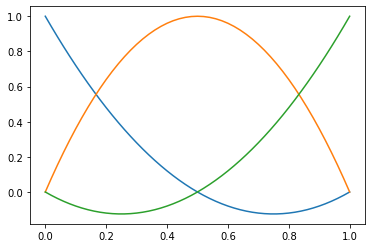

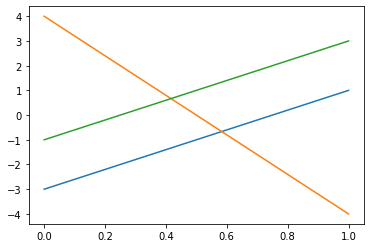

(51, 3)

In [8]:
# plotting 
x = linspace(0,1,51)
V = array([lagrange_basis(ref_vertices, i)(x) for i in range(len(ref_vertices))]).T
Vp = array([lagrange_basis_derivative(ref_vertices,i)(x) for i in range(len(ref_vertices))]).T
plot(x,V), show()
plot(x,Vp), show()
Vp.shape

In [9]:
# construct interpolatory quadrature formula on [0,1]
q,w = numpy.polynomial.legendre.leggauss(n_quadrature_points) # this is on [-1,1]
# -> rescaling on [0,1]
q = (q+1)/2
w = w/2

In [10]:
# global numbering of the basis functions i = P[k,alpha]
P = zeros((M,degree+1), dtype=int)

for k in range(M):
    start = k*degree
    P[k] = array(range(start, start+degree+1))

In [11]:
# condition to check that everything holds
P.max() == N-1

True

In [12]:
# construct quadrature points for each subinterval
Q = array([mapping(vertices, k)(q) for k in range(M)])

In [13]:
Q

array([[0.00938202, 0.04615307, 0.1       , 0.15384693, 0.19061798],
       [0.20938202, 0.24615307, 0.3       , 0.35384693, 0.39061798],
       [0.40938202, 0.44615307, 0.5       , 0.55384693, 0.59061798],
       [0.60938202, 0.64615307, 0.7       , 0.75384693, 0.79061798],
       [0.80938202, 0.84615307, 0.9       , 0.95384693, 0.99061798]])

In [14]:
# construct Jxw product for each subinterval
JxW = array([mapping_J(vertices,k)*w for k in range(M)])

In [15]:
JxW

array([[0.02369269, 0.04786287, 0.05688889, 0.04786287, 0.02369269],
       [0.02369269, 0.04786287, 0.05688889, 0.04786287, 0.02369269],
       [0.02369269, 0.04786287, 0.05688889, 0.04786287, 0.02369269],
       [0.02369269, 0.04786287, 0.05688889, 0.04786287, 0.02369269],
       [0.02369269, 0.04786287, 0.05688889, 0.04786287, 0.02369269]])

In [16]:
einsum('kq, kq', Q, JxW) # contracting both indices

# same as:
# integral = 0
# for k in range(M):
#     integral = integral + Q[k].dot(JxW[k])
# integral

0.5000000000000001

In [17]:
# construct matrix B such that B[k][x][i] is basis i evaluated at x in segment k
B = zeros((M,len(x),N))

for k in range(M):
    B[k,:,P[k]] = V.T

In [18]:
# construct mesh for plot on each subinterval
X = array([mapping(vertices, k)(x) for k in range(M)])

In [19]:
X.shape, B.shape

((5, 51), (5, 51, 11))

In [20]:
# prepare for plotting 
X = X.flatten() # turn into array by flattening
B = B.reshape((len(X),-1)) # turn into matrix with two dimensions by flattening
X.shape, B.shape

((255,), (255, 11))

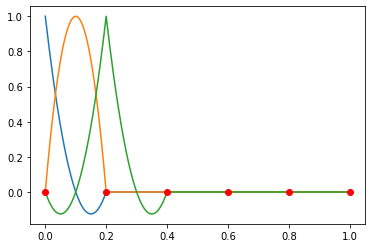

In [21]:
# plot basis functions (only first 3)
_ = plot(X, B[:,0:3])
_ = plot(vertices, 0*vertices, 'ro')

In [22]:
# plot interpolated function
support_points = linspace(a,b,N)
support_points

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [23]:
def runge(x):
    return 1/(1+50*(x-.5)**2)

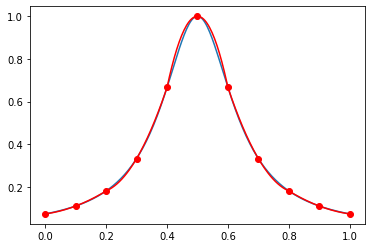

In [24]:
plot(X, runge(X))
plot(support_points, runge(support_points), 'ro')
plot(X, B.dot(runge(support_points)), 'r')

In [25]:
# prepare for integration -> WRONG WAY
Bq = zeros((M, n_quadrature_points, N))
Bprimeq = zeros((M, n_quadrature_points, N))

Vq = array([lagrange_basis(ref_vertices,i)(q) for i in range(degree+1)]).T
Vprimeq = array([lagrange_basis_derivative(ref_vertices,i)(q) for i in range(degree+1)]).T

for k in range(M):
    Bq[k,:,P[k]] = Vq.T
    Bprimeq[k,:,P[k]] = Vprimeq.T/mapping_J(vertices, k)

In [26]:
Xq = Q.flatten()
Bq = Bq.reshape((len(Xq), -1))
Bprimeq = Bprimeq.reshape((len(Xq), -1))
JxWq = JxW.flatten()

In [27]:
# summing [v_i(x_q)*v_j(x_q)* w(x_q)*J(x_q)]
mass_matrix = einsum('qi,qj,q', Bq, Bq, JxWq)
stiffness_matrix = einsum('qi,qj,q', Bprimeq, Bprimeq, JxWq)
# impose bc otherwise it is not well conditioned
stiffness_matrix[0,:] = stiffness_matrix[-1,:] = 0
stiffness_matrix[0,0] = stiffness_matrix[-1,-1] = 1

In [28]:
mass_matrix.shape

(11, 11)

In [29]:
# integral of runge function -> sum of v_i(x_q) f(x_q) J(x_q)
mass_rhs = einsum('qi,q,q', Bq, runge(Xq), JxWq)

In [30]:
mass_rhs.shape

(11,)

In [31]:
u_projection = linalg.solve(mass_matrix, mass_rhs)

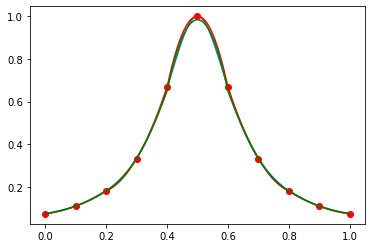

In [32]:
plot(X, runge(X))
plot(support_points, runge(support_points), 'ro')
plot(X, B.dot(runge(support_points)), 'r')
plot(X, B.dot(u_projection), 'g')

In [33]:
# compute general interpolation (?)
def rhs_function(x):
    return sin(2*pi*x)

rhs = einsum('qi,q,q', Bq, rhs_function(Xq), JxWq)
rhs[0] = rhs[-1] = 0

In [34]:
u = linalg.solve(stiffness_matrix, rhs)

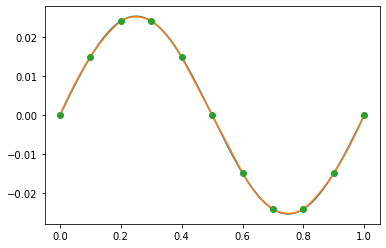

In [35]:
plot(X, rhs_function(X)/(4*pi**2))
plot(X, B.dot(u))
plot(support_points, rhs_function(support_points)/(4*pi**2), 'o')

In [38]:
# gathering all in one single function
def fem(M, exact_function, rhs_function, degree=1, a=0, b=1):
    assert degree > 0
    
    n_quadrature_points = 2*degree+1
    N = M*degree+1
    
    ref_vertices = linspace(0,1,degree+1)
    vertices = linspace(a,b,M+1) 
    
    q,w = numpy.polynomial.legendre.leggauss(n_quadrature_points)
    q = (q+1)/2
    w = w/2
    
    Vq = array([lagrange_basis(ref_vertices,i)(q) for i in range(degree+1)]).T
    Vprimeq = array([lagrange_basis_derivative(ref_vertices,i)(q) for i in range(degree+1)]).T
    
    P = zeros((M,degree+1), dtype=int)

    for k in range(M):
        start = k*degree
        P[k] = array(range(start, start+degree+1))
        
    assert P.max() == N-1
        
    Q = array([mapping(vertices, k)(q) for k in range(M)])
    JxW = array([mapping_J(vertices,k)*w for k in range(M)])  
    
    Bq = zeros((M, n_quadrature_points, N))
    Bprimeq = zeros((M, n_quadrature_points, N))
    
    for k in range(M):
        Bq[k,:,P[k]] = Vq.T
        Bprimeq[k,:,P[k]] = Vprimeq.T/mapping_J(vertices, k)
    
    Xq = Q.flatten()
    Bq = Bq.reshape((len(Xq), -1))
    Bprimeq = Bprimeq.reshape((len(Xq), -1))
    JxWq = JxW.flatten()
    
    stiffness_matrix = einsum('qi,qj,q', Bprimeq, Bprimeq, JxWq)
    stiffness_matrix[0,:] = stiffness_matrix[-1,:] = 0
    stiffness_matrix[0,0] = stiffness_matrix[-1,-1] = 1
    
    rhs = einsum('qi,q,q', Bq, rhs_function(Xq), JxWq)
    rhs[0] = rhs[-1] = 0
    
    u = linalg.solve(stiffness_matrix, rhs)
    error = sqrt(einsum('q,q', (Bq.dot(u)-exact_function(Xq))**2, JxWq))
    
    return error

In [39]:
def exact_function(x):
    return sin(2*pi*x)

def rhs_function(x):
    return sin(2*pi*x)*(4*pi**2)

fem(5, exact_function, rhs_function, 2)

0.007879868685106421